# Define the agents

In [1]:
import random
import math
from numpy.core.shape_base import atleast_2d
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch



In [2]:
# Import functions in the function file

%run trade_functions.ipynb


## define encounter matrix

In [3]:
economy_size=1000

In [4]:
import numpy as np

# Create a 100x100 matrix filled with 1s
matrix = np.ones((economy_size, economy_size))

# And  Set the diagonal elements to 0
np.fill_diagonal(matrix, 0)


## Define Economy 

In [5]:
agent_a = create_agent()
agent_a['id_list'] = [i for i in range(economy_size)]
agent_a['parameter']=[[3,3,3] for _ in range(economy_size)]
agent_a['money']=[1 for _ in range(economy_size)]
agent_a['gooda']=[0.5 for _ in range(economy_size)]
agent_a['goodb']=[1 for _ in range(economy_size)]


In [6]:
agent_b = create_agent()
agent_b['id_list'] = [i for i in range(economy_size)]
agent_b['parameter']=[[3,3,3] for _ in range(economy_size)]
agent_b['money']=[1 for _ in range(economy_size)]
agent_b['gooda']=[0.5 for _ in range(economy_size)]
agent_b['goodb']=[1 for _ in range(economy_size)]



In [7]:
agent_c = create_agent()
agent_c['id_list'] = [i for i in range(economy_size)]
agent_c['parameter']=[[2,2,2] for _ in range(economy_size)]
agent_c['money']=[1 for _ in range(economy_size)]
agent_c['gooda']=[0.5 for _ in range(economy_size)]
agent_c['goodb']=[1 for _ in range(economy_size)]

agent_c['constant']=[1 for _ in range(economy_size)]


#Defne  inhomogeneous economy

## trade function

In [8]:
def tester(agent1,agent2,gm,length,size,f1,f2):
  
  
  mla=[gm[2]]*economy_size
  gala=[gm[0]]*economy_size
  gbla=[gm[1]]*economy_size
  
  parametera=agent2['parameter'].copy()
    
  mlb=agent1['money'].copy()
  galb=agent1['gooda'].copy()
  gblb=agent1['goodb'].copy()
  constant=agent1['constant'].copy()
  parameterb=agent1['parameter'].copy()
  sum_eta=np.sum(agent1['parameter'][2])
  sum_alpha1=np.sum(agent1['parameter'][0])
  sum_alpha2=np.sum(agent1['parameter'][1])
 

  

  ga2_history=[]
  gb2_history=[]
  m2_history=[] 

  for i in range(length[0]):
    
        gala,gbla,mla=intra_trade(gala,gbla,mla,parametera,matrix,1,f1,f1)
        
      
        
        galb,gblb,mlb=intra_trade(galb,gblb,mlb,parameterb,matrix,1,f2,f2)
        
      
        # test v1,v2 and beta
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,1,[1,0,0],f1,f2)
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,1,[0,1,0],f1,f2)
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,1,[0,0,1],f1,f2)
       
        
       
      
    

    
    
  
    

  for k in range (8):
      size=size*0.5
    
      for j in range(length[1]):
        
        gala,gbla,mla=intra_trade(gala,gbla,mla,parametera,matrix,1,f1,f1)
        
      
        
        galb,gblb,mlb=intra_trade(galb,gblb,mlb,parameterb,matrix,1,f2,f2)
        
      
        # test v1,v2 and beta
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,size,[1,0,0],f1,f2)
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,size,[0,1,0],f1,f2)
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,size,[0,0,1],f1,f2)
    
        
       
        ga2_history.append(sum(galb))
        gb2_history.append(sum(gblb))
        m2_history.append(sum(mlb))
        

  return ga2_history,gb2_history,m2_history

In [9]:
def get_value(lst,sum_p,lenx):
    sub_list=lst[-lenx:]
    value_list=[ sum_p/x for x in sub_list]
    return np.mean(value_list)
    

In [10]:
def get_v(gm1,length1,f1):
   
    vga,vgb,vm=tester(agent_c,agent_a,gm1,length1,1,f1,utility_func_cd)
    
    mvga=get_value(vga,2000,10000)
    mvgb=get_value(vgb,2000,10000)
    mvm=get_value(vm,2000,10000)
    
  
    return mvga,mvgb,mvm
        

# graphs

In [55]:
gm1=[1,0.5,1]
v1l=[]
v2l=[]
for i in range(10):
    v1t=[]
    v2t=[]
    for j in range (20):
        g11,g21,g31=get_v(gm1,[20000,20000],utility_func_s)
        v1t.append(g11)
        v2t.append(g21)
    print(i,v1t,v2t)
    v1l.append(np.mean(v1t))
    v2l.append(np.mean(v2t))
    gm1[0]=gm1[0]+0.03
print(v1l,v2l)
    
    
    
    

0 [2.262756178761946, 2.2608057220798634, 2.265783007609613, 2.2846207875932554, 2.2674045465501678, 2.2687546064213238, 2.2695214036310825, 2.27887668121207, 2.2579555575187653, 2.2693111943666735, 2.280023373438525, 2.2720910549260336, 2.279644640885347, 2.261314848386135, 2.2695938871664083, 2.2682687756603963, 2.2835047861412, 2.2670715601720812, 2.279440008374425, 2.2585813879838157] [3.444328719223277, 3.428743222276782, 3.453832676938572, 3.4518656998806736, 3.4538486740707572, 3.4501626630811915, 3.473131746389019, 3.439967601146517, 3.4706868675139777, 3.4455986013469695, 3.4474603766927228, 3.4283490141207884, 3.4574222973468762, 3.414728484294087, 3.4495233347681844, 3.4653687856229745, 3.467214399700954, 3.427476529165938, 3.4699490672825517, 3.4425895876927637]
1 [2.212687363271463, 2.2059143431327675, 2.2165679150061512, 2.214595202023239, 2.21217715005826, 2.223883180604033, 2.2218762512045127, 2.20586817851327, 2.2088373027750787, 2.203144675816985, 2.216304041395264, 2

[2.2702662004439564, 2.216064926849904, 2.159483528664546, 2.1131644393254594, 2.0661290916137336, 2.018666947767769, 1.9760912665800177, 1.9352164801867087, 1.8924918188691469, 1.8586862711241285] [3.4491124174277794, 3.4277726605723244, 3.405754145795312, 3.384713515568392, 3.3680979072381994, 3.342444239238172, 3.321962675343349, 3.3075878845780244, 3.2925577841187303, 3.2736269229970247]

In [64]:
gm1=[1,0.5,1]
v1lc=[]
v2lc=[]
for i in range(10):
    v1t=[]
    v2t=[]
    for j in range (20):
        g11,g21,g31=get_v(gm1,[20000,20000],utility_func_c)
        v1t.append(g11)
        v2t.append(g21)
    print(v1t,v2t)
    v1lc.append(np.mean(v1t))
    v2lc.append(np.mean(v2t))
    gm1[0]=gm1[0]+0.03
print(v1lc,v2lc)

[1.4424497375427583, 1.4411234372355834, 1.428272653144459, 1.4364411325264619, 1.4350199443087084, 1.4354043710073883, 1.449492684272242, 1.4419273532500185, 1.4312559324117864, 1.4419072762561576, 1.4435665008631997, 1.4313314507214248, 1.4364208746970137, 1.4479230172157853, 1.4464058507546373, 1.431973762055819, 1.4475321542943616, 1.4415482338438284, 1.4360094872305567, 1.4285993767859135] [5.132983369355314, 5.157277415650203, 5.167724992523171, 5.121679583119557, 5.165913043060302, 5.1134814986151325, 5.1550916284768915, 5.116372598922638, 5.149043914816881, 5.150712187740435, 5.161192893528385, 5.124000107391736, 5.157968184887309, 5.152339535584499, 5.108036597790505, 5.148466935547719, 5.174363205934504, 5.162655600719249, 5.138875418925719, 5.129819823628619]
[1.3867200883873765, 1.3841901253162774, 1.3763367307009922, 1.3778006807235488, 1.3797082837337231, 1.3793727831847375, 1.3839968148673591, 1.3824067236809643, 1.3717431183005115, 1.3900848448243615, 1.37720524683947, 

In [ ]:
[1.4387302615209054, 1.3800033060414254, 1.3284962435970684, 1.2776442949656581, 1.2353252942861566, 1.1914438410184176, 1.1518868499440802, 1.1154775207853962, 1.0792830799017668, 1.0456755055721154] [5.144399926810939, 5.1603331263527386, 5.18895493005011, 5.222115933964044, 5.247160107593083, 5.28215265655579, 5.28965013566947, 5.3147750395523286, 5.334878056495748, 5.350407696582663]

In [65]:
# define G1 list
ga=result = [1000+ i * 30 for i in range(10)]

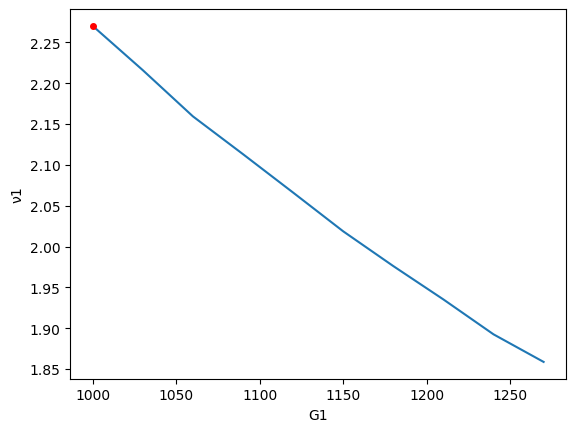

In [81]:

# Example data


# Calculate the numerical derivative of priceb with respect to ga


# Plot the derivative
plt.plot(ga, v1l)
y_min, y_max = plt.ylim()
plt.yticks(np.arange(round(y_min, 1), round(y_max, 1) + 0.05, 0.05))
# Add labels and title
plt.xlabel('G1')
plt.ylabel('ν1')
plt.plot(ga[0], v1l[0], 'ro', markersize=4)

# Show the plot
plt.show()

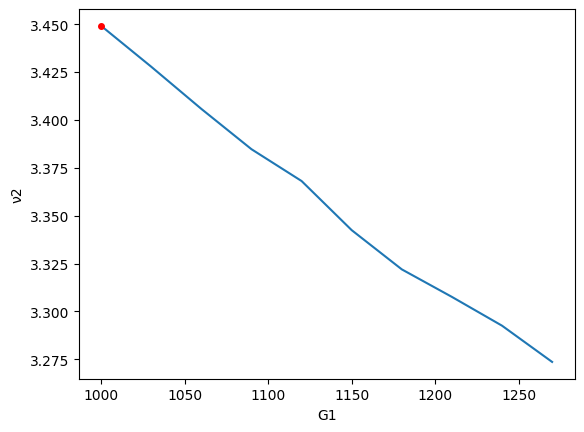

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Example data




# Plot the derivative
plt.plot(ga, v2l)


# Add labels and title
plt.xlabel('G1')
plt.ylabel('ν2')
plt.plot(ga[0], v2l[0], 'ro', markersize=4)

# Show the plot
plt.show()

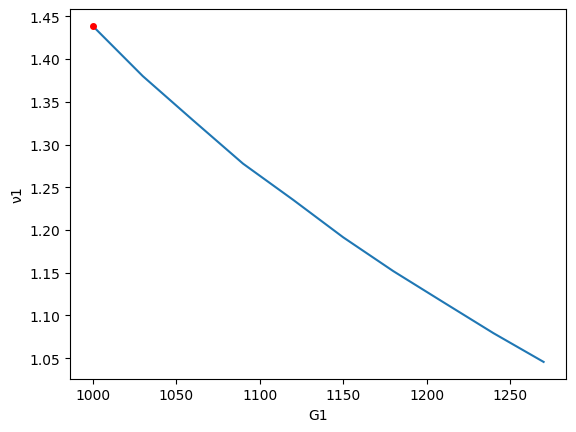

In [86]:



# Plot the derivative
plt.plot(ga, v1lc)

# Add labels and title
plt.xlabel('G1')
plt.ylabel('ν1')
plt.plot(ga[0], v1lc[0], 'ro', markersize=4)

# Show the plot
plt.show()

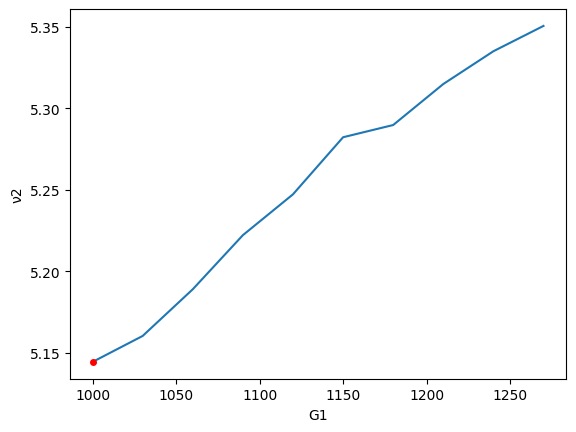

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# Example data




# Plot the derivative
plt.plot(ga, v2lc)

# Add labels and title
plt.xlabel('G1')
plt.ylabel('ν2')
plt.plot(ga[0], v2lc[0], 'ro', markersize=4)

# Show the plot
plt.show()

# Derivatives

In [11]:
def testp(agent1,agent2,gm,length,size,f1,f2):
  
  
  mla=[gm[2]]*economy_size
  gala=[gm[0]]*economy_size
  gbla=[gm[1]]*economy_size
  
  parametera=agent2['parameter'].copy()
    
  mlb=agent1['money'].copy()
  galb=agent1['gooda'].copy()
  gblb=agent1['goodb'].copy()
    
  mlc=agent1['money'].copy()
  galc=agent1['gooda'].copy()
  gblc=agent1['goodb'].copy()
    
  
  parameterb=agent1['parameter'].copy()
  parameterc=agent1['parameter'].copy()
    
  sum_eta=np.sum(agent1['parameter'][2])
  sum_alpha1=np.sum(agent1['parameter'][0])
  sum_alpha2=np.sum(agent1['parameter'][1])
 

  

  ga2_history=[]
  gb2_history=[]
  m2_history=[] 
    
  ga3_history=[]
  gb3_history=[]
  m3_history=[] 

  for i in range(length[0]):
    
        gala,gbla,mla=intra_trade(gala,gbla,mla,parametera,matrix,1,f1,f1)
        
      
        
        galb,gblb,mlb=intra_trade(galb,gblb,mlb,parameterb,matrix,1,f2,f2)
        galc,gblc,mlc=intra_trade(galc,gblc,mlc,parameterc,matrix,1,f2,f2)
        
      
        # test v1,v2 and beta
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,1,[1,0,1],f1,f2)
        gala,gbla,mla,galc,gblc,mlc=test_trade(gala,gbla,mla,galc,gblc,mlc,parametera,parameterc,matrix,1,[0,1,1],f1,f2)
        
       
        
       
      
    

    
    
  
    

  for k in range (5):
      size=size*0.5
    
      for j in range(length[1]):
        
        gala,gbla,mla=intra_trade(gala,gbla,mla,parametera,matrix,1,f1,f1)
        
      
        
        galb,gblb,mlb=intra_trade(galb,gblb,mlb,parameterb,matrix,1,f2,f2)
        galc,gblc,mlc=intra_trade(galc,gblc,mlc,parameterc,matrix,1,f2,f2)
        
      
        # test v1,v2 and beta
        gala,gbla,mla,galb,gblb,mlb=test_trade(gala,gbla,mla,galb,gblb,mlb,parametera,parameterb,matrix,size,[1,0,1],f1,f2)
        gala,gbla,mla,galc,gblc,mlc=test_trade(gala,gbla,mla,galc,gblc,mlc,parametera,parameterc,matrix,size,[0,1,1],f1,f2)
        
    
        
       
        ga2_history.append(sum(galb))
        gb2_history.append(sum(gblb))
        m2_history.append(sum(mlb))
        ga3_history.append(sum(galc))
        gb3_history.append(sum(gblc))
        m3_history.append(sum(mlc))
        

  return ga2_history,gb2_history,m2_history,ga3_history,gb3_history,m3_history

In [12]:
def get_price(lst1,lst2,lenx):
    sub_list1=lst1[-lenx:]
    sub_list2=lst2[-lenx:]
    value_list= [a / b for a, b in zip(sub_list1, sub_list2)]
    return np.mean(value_list)

In [13]:
def get_p(gm1,length1,f1):
   
    ga1,gb1,m1,ga2,gb2,m2=testp(agent_c,agent_a,gm1,length1,1,f1,utility_func_cd)
    
    mpga=get_price(m1,ga1,10000)
    mpgb=get_price(m2,gb2,10000)
    
    
  
    return mpga,mpgb

In [14]:

def pmatrix_tester(agm1,type_g,gap,utility_f):
   
   
    
    p1t=[]
    p2t=[]
    
    for j in range (100):
        p11,p21=get_p(gm1,[20000,10000],utility_f)
        p1t.append(p11)
        p2t.append(p21)
        print(j,p11,p21)
       
          
    return np.mean(p1t),np.mean(p2t)

In [15]:


def vmatrix_tester(gm1,type_g,gap,utility_f):
   
   
    
    p1t=[]
    p2t=[]
    
    for j in range (100):
        g11,g21,g31=get_v(gm1,[20000,10000],utility_f)
        p1t.append(g11)
        p2t.append(g21)
        print(j,g11,g21)
       
          
    return np.mean(p1t),np.mean(p2t)

In [16]:

gap=0.03

# get v matrix

In [17]:
gm1=[1,0.5,1]
v10s,v20s=vmatrix_tester(gm1,0,gap,utility_func_s)
print(v10s,v20s)

0 2.292712642996312 3.433520758765487
1 2.275977266510724 3.457791570969387
2 2.279535519181165 3.4244932249190074
3 2.2910778638051377 3.467326276874499
4 2.2904433326064875 3.451349744968181
5 2.2542458156869527 3.4537454330314112
6 2.241966275569951 3.421898476294655
7 2.2987903979417768 3.4500298276816896
8 2.2675954706928145 3.4838768989959585
9 2.2733832342114284 3.4846328566554527
10 2.2577922340700116 3.412707588152685
11 2.2734074956918953 3.445131025570035
12 2.2868872870444372 3.461800784512524
13 2.244226599043913 3.4811944150473457
14 2.25074166039559 3.4160976171907445
15 2.26412508158438 3.4298310647073573
16 2.2687898976487806 3.4218998620834076
17 2.280596072306483 3.478590034895845
18 2.247865098948642 3.449707738008635
19 2.2573613504762493 3.4278954550052694
20 2.282969527690207 3.422726535394312
21 2.276785275032544 3.435275660727686
22 2.276410470894398 3.485001459891236
23 2.2662156181850537 3.437983235285021
24 2.2824268498489344 3.45892154696273
25 2.2719370197

In [18]:
gm1=[1.03,0.5,1]
v1as,v2as=vmatrix_tester(gm1,0,gap,utility_func_s)
print(v1as,v2as)

0 2.215297233011566 3.4878844476716475
1 2.1986557022285895 3.412017429527322
2 2.2252283467110203 3.410459425607796
3 2.2040994814431882 3.395529536228879
4 2.1958412109535246 3.4447204270116805
5 2.1997715772534336 3.405590225556065
6 2.2044932186918396 3.42001844058668
7 2.2061441300501703 3.476604192365615
8 2.213646788154676 3.4162798946507262
9 2.2361091519175536 3.443940306042504
10 2.232409380969141 3.423331498098109
11 2.2267558568585706 3.421032205100101
12 2.224736885199048 3.430741415411346
13 2.197115503231619 3.431805318031351
14 2.198447161061861 3.4205844023559324
15 2.2200071494436315 3.4526723159440023
16 2.20985010285552 3.3890503114564963
17 2.2039728561075944 3.419085921738154
18 2.2241778987662317 3.4304923071337043
19 2.220144618834672 3.425426198052334
20 2.228801767378154 3.430065634944533
21 2.186115432691661 3.428176103592795
22 2.2241809392639 3.409463106845169
23 2.2308998805148685 3.4201271989566333
24 2.2140772960622632 3.423333123962835
25 2.225282227542

In [19]:
gm1=[1,0.515,1]
v1bs,v2bs=vmatrix_tester(gm1,1,gap,utility_func_s)
print(v1bs,v2bs)

0 2.261830234501181 3.3586896052685145
1 2.263778907951503 3.360257034930328
2 2.2719987320237336 3.375728382221809
3 2.272924356620304 3.3678882995388246
4 2.261097363564361 3.39476522557814
5 2.2575304257289943 3.3814868542870906
6 2.244833806784913 3.3503603500460266
7 2.256352412963671 3.3478502396167364
8 2.2502537765383295 3.3995172758989423
9 2.229434614770203 3.379056723890856
10 2.2465083115203197 3.3715863510199173
11 2.248617204416777 3.3529974902860173
12 2.2497401865008926 3.394010140878624
13 2.2547429587680314 3.398313801528081
14 2.283651144209833 3.368766075270628
15 2.2682873803140606 3.35919630461873
16 2.262607128949149 3.38124746874916
17 2.265142169918879 3.35524292617427
18 2.267418544335143 3.352433534633505
19 2.28753127848761 3.354643389588299
20 2.2488942229344095 3.305524506078372
21 2.252772011255334 3.364949646672834
22 2.2386303894903334 3.384015353605068
23 2.2683058080347864 3.3587155163889424
24 2.2612512246749494 3.3566102798020845
25 2.26028973145492

In [17]:
v10s,v20s=2.2711277665115785,3.4486087696224437
v1as,v2as=2.2164655740471138,3.428125104048527
v1bs,v2bs=2.25663193827916, 3.3780850062218697

## Complement

In [20]:
gm1=[1,0.5,1]
v10c,v20c=vmatrix_tester(gm1,0,gap,utility_func_c)
print(v10c,v20c)

0 1.441670120120719 5.139306241056729
1 1.4430422514783083 5.14887556969299
2 1.437152148451089 5.174523221657285
3 1.4447971359535714 5.134459690416219
4 1.4330063326273803 5.1469533136985275
5 1.4502466243411853 5.149692421434167
6 1.4227607706332321 5.170638637341056
7 1.4486942908404934 5.184972930980462
8 1.432585569821241 5.154303565300276
9 1.4387543123653355 5.1176708697609925
10 1.4319927604481333 5.148083720057237
11 1.4341367689599835 5.187134811497627
12 1.4417510720599374 5.184470747006098
13 1.4480948389362693 5.151315761646404
14 1.449444958705739 5.134328848833572
15 1.445013577109862 5.11133774268758
16 1.4349164010644133 5.116423839366449
17 1.4610770840725174 5.143183978458377
18 1.4396381134059333 5.13288473641132
19 1.4352707232005466 5.139101240812209
20 1.4429284290921864 5.0887981960361355
21 1.4261161478894688 5.135732312535642
22 1.423037066483716 5.180459810263605
23 1.449987290918301 5.205230268444141
24 1.4384784052583324 5.146156147762311
25 1.439074448059

In [21]:
gm1=[1.03,0.5,1]
v1ac,v2ac=vmatrix_tester(gm1,0,gap,utility_func_c)
print(v1ac,v2ac)

0 1.3758315765248905 5.255138489630476
1 1.3975348841757702 5.121451844453804
2 1.3868499981997817 5.192512690693229
3 1.4009022119353256 5.133723020174998
4 1.3903037074872344 5.110816019431855
5 1.3937173412552055 5.194863476557414
6 1.3876162942227122 5.224040246485803
7 1.3904776948135869 5.205558694741125
8 1.3722142075445332 5.097406212912226
9 1.3695437579794385 5.212424131849921
10 1.3791434063046661 5.157298099959571
11 1.3908829743042068 5.069404059860315
12 1.3914963398645848 5.190634151643608
13 1.3771730498921662 5.12226618613524
14 1.3859108162440197 5.210859109786681
15 1.375785587012946 5.181392284939185
16 1.3857005354021033 5.19680605152883
17 1.3803115099299876 5.17002561738458
18 1.3735559319595818 5.153026924205699
19 1.3924978246392103 5.164469247609949
20 1.372352870365726 5.1132801713599125
21 1.387509764334904 5.187321843683898
22 1.3919533816745508 5.1397878952188565
23 1.3818522367584178 5.157567311723488
24 1.4021426094043803 5.16581568847192
25 1.3915132443

In [ ]:
gm1=[1,0.515,1]
v1bc,v2bc=vmatrix_tester(gm1,1,gap,utility_func_c)
print(v1bc,v2bc)

In [18]:
a_s=(v1as-v10s)/0.03
b_s=(v2as-v20s)/0.03
c_s=(v1bs-v10s)/0.015
d_s=(v2bs-v20s)/0.015

In [19]:
print(round(a_s,3),round(b_s,3),round(c_s,3),round(d_s,3))

-1.822 -0.683 -0.966 -4.702


In [ ]:
-1.804 -0.712 -0.797 -5.077

In [100]:
a_c=(v1ac-v10c)/0.03
b_c=(v2ac-v20c)/0.03
c_c=(v1bc-v10c)/0.015
d_c=(v2bc-v20c)/0.015

In [101]:
print(round(a_c,3),round(b_c,3),round(c_c,3),round(d_c,3))

-1.932 1.254 1.149 -12.054


### Substitute v matrix


\begin{bmatrix} -1.804 & -0.712 \\ -0.797 & -5.077 \end{bmatrix}



\begin{bmatrix} -1.932 & 1.254 \\ 1.149 & -12.054 \end{bmatrix}

# Get P matrix

In [ ]:
gm1=[1,0.5,1]
p10s,p20s=pmatrix_tester(gm1,0,gap,utility_func_s)
print(p10s,p20s)

In [ ]:
gm1=[1.03,0.5,1-(p10s*0.03)]
p1as,p2as=pmatrix_tester(gm1,0,gap,utility_func_s)
print(p1as,p2as)

In [ ]:
gm1=[1,0.515,1-(p20s*0.015)]
p1bs,p2bs=pmatrix_tester(gm1,0,gap,utility_func_s)
print(p1bs,p2bs)

# complement

In [ ]:
gm1=[1,0.5,1]
p10c,p20c=pmatrix_tester(gm1,0,gap,utility_func_c)
print(p10c,p20c)

In [ ]:
gm1=[1.03,0.5,1-(p10c*0.03)]
p1ac,p2ac=pmatrix_tester(gm1,0,gap,utility_func_c)
print(p1ac,p2ac)

In [ ]:
gm1=[1,0.515,1-(p20c*0.015)]
p1bc,p2bc=pmatrix_tester(gm1,0,gap,utility_func_c)
print(p1bc,p2bc)

In [29]:
a_s=(p1as-p10s)/0.03
b_s=(p2as-p20s)/0.03
c_s=(p1bs-p10s)/0.015
d_s=(p2bs-p20s)/0.015

In [25]:
p10s,p20s=0.7571908641888614,1.150185581943085
p1as,p2as=0.7212866004021501,1.1164776979541977
p1bs,p2bs=0.73863843603497, 1.1049535658718952

In [35]:
p10c,p20c=0.48012477589320346 ,1.7128367727399394
p1ac,p2ac=0.454531, 1.699843
p1bc,p2bc=0.47263048530878854,1.6085240903074904

In [ ]:
-1.228 -1.049 -1.155 -3.016

In [30]:
print(round(a_s,3),round(b_s,3),round(c_s,3),round(d_s,3))

-1.197 -1.124 -1.237 -3.015


In [33]:
a_c=(p1ac-p10c)/0.03
b_c=(p2ac-p20c)/0.03
c_c=(p1bc-p10c)/0.015
d_c=(p2bc-p20c)/0.015

In [36]:
print(round(a_c,3),round(b_c,3),round(c_c,3),round(d_c,3))

-0.853 -0.433 -0.5 -6.954


In [104]:
### Substitutte p matrix